# Zadanie 1

In [1]:
#wylosowanie węzłów interpolacji
xs =  1:1:10
ys = [rand() for x in xs]

10-element Array{Float64,1}:
 0.9864235340749192
 0.6575389408765071
 0.6457039436286105
 0.8017304324871597
 0.442640668548663
 0.6568724948239182
 0.9097921885654445
 0.9749497542537617
 0.292194472997251
 0.8862600110142869

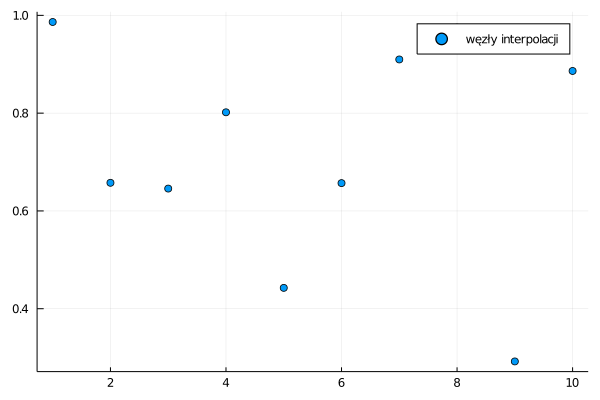

In [109]:
using Plots
scatter(xs,ys, label="węzły interpolacji")

zgodnie z wikipedią, wielomian interpolacyjny Lagrange'a ma postać $$ w(x)= \sum_{i=0}^{n}y_i*\prod_{j=0\wedge j\neq i}^{n}\frac{x-x_j}{x_i-x_j} $$

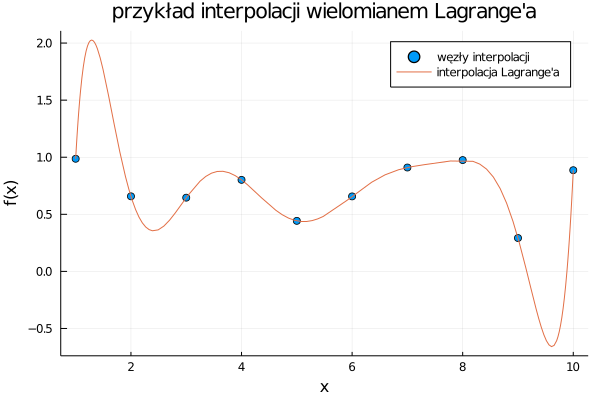

In [110]:
function lagrange_polynomial(point,x,y)
    sum = 0
    for i = 1:length(y)
        prod = 1
        for j = 1:length(x)
            if i != j
                prod = prod * ((point - x[j])/(x[i] - x[j]))
            end
        end
        sum = sum + y[i]*prod
    end
    return sum
end

lagrange = function(point)
    lagrange_polynomial(point,xs,ys)
end

plot!(lagrange, extrema(xs)...,label="interpolacja Lagrange'a", title="przykład interpolacji wielomianem Lagrange'a", xlabel="x",ylabel="f(x)")

# Zadanie 2

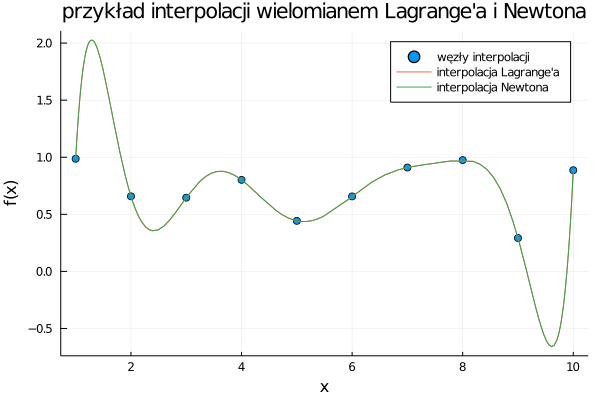

In [111]:
function generate_diff(x,y)
    #zdefiniowanie macierzy ilorazów różnicowych
    newt = zeros(Float32, length(x), length(x))

    #obliczenie brzegowych wartości macierzy ilorazów:
    for i = 1:length(y)
        newt[i, 1] = y[i]
    end

    #obliczenie pozostałych elementów macierzy

    for j = 2:length(y)
        for i = 1:(length(y)-j+1)
            newt[i, j] = (newt[i+1,j-1]-newt[i, j-1])/(x[j+i-1] - x[i])
        end
    end
    newt
end



function horner(point, i, newt,x,y)
    if i < length(x)
        return newt[1,i]+(point-x[i])*horner(point, i+1, newt,x,y)
    else
        return newt[1, i]
    end
end

newton = generate_diff(xs,ys)

function f(point)
    i = 1
    horner(point, i, newton,xs,ys)
end
plot!(f, extrema(xs)..., title="przykład interpolacji wielomianem Lagrange'a i Newtona", label="interpolacja Newtona")

# Zadanie 3

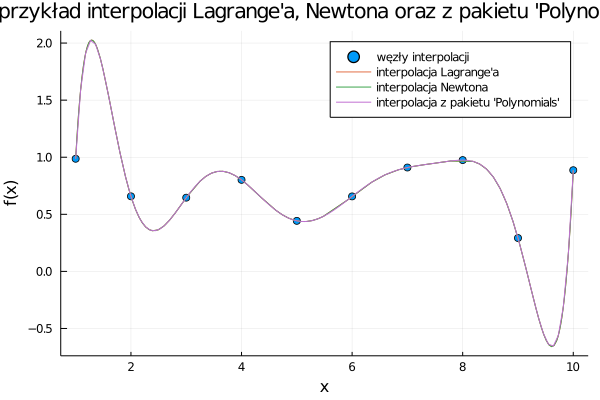

In [112]:
#using Polynomials

from_package=fit(xs, ys)

plot!(from_package, extrema(xs)..., title="przykład interpolacji Lagrange'a, Newtona oraz z pakietu 'Polynomials'", label="interpolacja z pakietu 'Polynomials'")

Można zauważyć, że wszystkie wykresy idealnie nakładają się na siebie. Jest to spowodowane tym, że nie istnieją dwa różne wielomiany stopnia n, które przyjmują takie same wartości w tych samych n+1 punktach

# Zadanie 4

In [33]:
using Random
using DataFrames

sleep(0.001)
function test_time()
    times = zeros(Float64, 10000, 6)
    for i = 1:1:1000
        for j = 1:10
            x =  1:1:i
            y = [rand() for element in x]

            times[(i-1)*10+j, 1] = i
            times[(i-1)*10+j, 2] = @elapsed lagrange_polynomial(rand(),x,y)
            times[(i-1)*10+j, 3] = @elapsed begin
                newton1 = generate_diff(x,y)
            end
            times[(i-1)*10+j, 4] = @elapsed horner(rand(),1,newton1,x,y)

            times[(i-1)*10+j, 5] = @elapsed begin
                func = fit(x,y)
            end
            times[(i-1)*10+j, 6] = @elapsed func(rand())
        end

    end
    times
end
result = test_time()


10000×6 Array{Float64,2}:
    1.0  3.01e-7    4.99e-7    3.01e-7    8.0e-6     7.0e-7
    1.0  0.0        9.9e-8     1.0e-7     7.01e-7    1.0e-7
    1.0  9.9e-8     1.0e-7     0.0        3.01e-7    1.0e-7
    1.0  1.0e-7     1.0e-7     0.0        3.0e-7     1.0e-7
    1.0  1.0e-7     0.0        0.0        3.99e-7    1.0e-7
    1.0  1.0e-7     1.01e-7    0.0        4.0e-7     0.0
    1.0  0.0        0.0        0.0        4.01e-7    1.0e-7
    1.0  1.0e-7     9.9e-8     0.0        4.01e-7    0.0
    1.0  0.0        0.0        0.0        3.99e-7    0.0
    1.0  0.0        0.0        0.0        7.99e-7    1.01e-7
    2.0  2.0e-7     3.99e-7    2.01e-7    6.99e-7    1.01e-7
    2.0  0.0        1.0e-7     0.0        3.99e-7    1.0e-7
    2.0  0.0        1.01e-7    1.0e-7     3.99e-7    0.0
    ⋮                                                ⋮
  999.0  0.0031006  0.0022516  1.81e-5    0.0014502  3.0e-7
  999.0  0.0031038  0.0022637  1.8501e-5  0.0014526  3.0e-7
 1000.0  0.003108   0.0025184

In [38]:
df = DataFrame()
df.ilość_punktów = result[:,1]
df.metoda_lagrangea = result[:,2]
df.generowanie_ilorazów_różnicowych = result[:,3]
df.wartości_wielomianu_newtona = result[:,4]
df.tworzenie_wielomianu_z_Polynomials = result[:,5]
df.wartości_z_Polynomials = result[:,6]
df

10000×6 DataFrame
   Row │ ilość_punktów  metoda_lagrangea  generowanie_ilorazów_różnicowych  wa ⋯
       │ Float64        Float64           Float64                           Fl ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │           1.0         3.01e-7                           4.99e-7       ⋯
     2 │           1.0         0.0                               9.9e-8
     3 │           1.0         9.9e-8                            1.0e-7
     4 │           1.0         1.0e-7                            1.0e-7
     5 │           1.0         1.0e-7                            0.0           ⋯
     6 │           1.0         1.0e-7                            1.01e-7
     7 │           1.0         0.0                               0.0
     8 │           1.0         1.0e-7                            9.9e-8
     9 │           1.0         0.0                               0.0           ⋯
    10 │           1.0         0.0                               0.0
    11 │           2.0         2.0e-7                            3.99e-7
   ⋮   │       ⋮               ⋮                         ⋮                     ⋱
  9991 │        1000.0         0.003108                          0.0025184
  9992 │        1000.0         0.0031109                         0.0023409     ⋯
  9993 │        1000.0         0.0031278                         0.0023133
  9994 │        1000.0         0.003109                          0.0022509
  9995 │        1000.0         0.0031045                         0.0080851
  9996 │        1000.0         0.0030303                         0.0021998     ⋯
  9997 │        1000.0         0.0030294                         0.0022039
  9998 │        1000.0         0.0030287                         0.0022583
  9999 │        1000.0         0.0030988                         0.0025664
 10000 │        1000.0         0.0030339                         0.0022227     ⋯
                                                 3 columns and 9979 rows omitted

In [41]:
using Statistics
gd =  groupby(df, :ilość_punktów)
avg_sd_df = combine(gd, :metoda_lagrangea => mean,
    :generowanie_ilorazów_różnicowych => mean,
    :wartości_wielomianu_newtona => mean,
    :tworzenie_wielomianu_z_Polynomials => mean, 
    :wartości_z_Polynomials => mean,
    :metoda_lagrangea => std,
    :generowanie_ilorazów_różnicowych => std,
    :wartości_wielomianu_newtona => std,
    :tworzenie_wielomianu_z_Polynomials => std, 
    :wartości_z_Polynomials => std)
avg_sd_df

1000×11 DataFrame
  Row │ ilość_punktów  metoda_lagrangea_mean  generowanie_ilorazów_różnicowych ⋯
      │ Float64        Float64                Float64                          ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │           1.0             8.0e-8                                 9.98e ⋯
    2 │           2.0             5.99e-8                                1.301
    3 │           3.0             2.399e-7                               1.0e-
    4 │           4.0             1.103e-7                               1.404
    5 │           5.0             1.703e-7                               1.2e- ⋯
    6 │           6.0             1.8e-7                                 1.6e-
    7 │           7.0             2.2e-7                                 2.0e-
    8 │           8.0             2.798e-7                               2.002
    9 │           9.0             3.298e-7                               2.001 ⋯
   10 │          10.0             3.906e-7                               2.595
   11 │          11.0             4.304e-7                               3.299
  ⋮   │       ⋮                  ⋮                              ⋮              ⋱
  991 │         991.0             0.00298912                             0.002
  992 │         992.0             0.00293984                             0.002 ⋯
  993 │         993.0             0.0029645                              0.002
  994 │         994.0             0.00293262                             0.002
  995 │         995.0             0.00297439                             0.002
  996 │         996.0             0.00318042                             0.003 ⋯
  997 │         997.0             0.00311782                             0.002
  998 │         998.0             0.00309869                             0.003
  999 │         999.0             0.00311225                             0.002
 1000 │        1000.0             0.00307813                             0.002 ⋯
                                                  9 columns and 979 rows omitted

In [55]:
scatter([avg_sd_df.metoda_lagrangea_mean avg_sd_df.generowanie_ilorazów_różnicowych_mean avg_sd_df.wartości_wielomianu_newtona_mean avg_sd_df.tworzenie_wielomianu_z_Polynomials_mean avg_sd_df.wartości_z_Polynomials_mean], layout = 5, title=["Lagrange'a" "ilorazy różnicowe" "Newtona" "Polynomials 1" "Polynomials 2"],
        xlabel="ilość punktów", ylabel="czas[s]", yerror=[avg_sd_df.metoda_lagrangea_std 
        avg_sd_df.generowanie_ilorazów_różnicowych_std
        avg_sd_df.wartości_wielomianu_newtona_std
        avg_sd_df.tworzenie_wielomianu_z_Polynomials_std
        avg_sd_df.wartości_z_Polynomials_std])

niestety z powodu małej ilości miejsca, musiałem skrócić nazwy wykresów. Polynomial 1 oznacza wykres, na którym podane są czasy tworzenia wielomianu za pomocą pakietu "Polynomials", a Polynomials 2 oznacza czasy obliczania wielomianu utworzonego wcześniej z pakietu "Polynomials"

# Zadanie 5

In [86]:
function neville(x,y,point)
    result = zeros(Float32, length(x))
    for k = 1:(length(x))
        result[k] = y[k];   
        for j in k-1:-1:1
            result[j] = result[j+1]+(result[j + 1] - result[j])*(point - x[k]) / (x[k] - x[j]);
        end
    end
    result[1]
end

function test_neville(x,y)
    for i = 1:length(x)
        val = rand()*10
        print(lagrange_polynomial(val,x,y), " ",neville(x,y,val),"\n")
    end
end

test_neville(xs,ys)

-6.875124267197301 -6.8751254
0.9424087926772629 0.9424089
0.5047162419831147 0.5047163
0.4606721214728949 0.4606721
0.4708525599649966 0.47085255
0.28948811404637315 0.28948903
0.8771440217058487 0.87714416
0.8418664214695775 0.84186643
0.7587729660259565 0.75877297
0.35513185855755935 0.35513195


wartości wielomianu w algorytmie Nevilla i Lagrange'a są takie same

# Zadanie 6

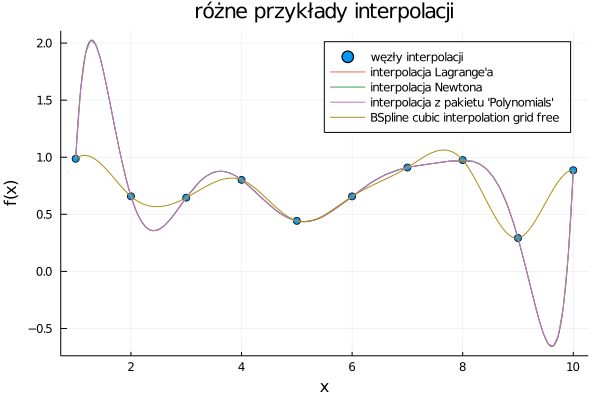

In [113]:
#using Pkg
#Pkg.add("Interpolations")
#using 

xsf=1:0.01:10
itp = interpolate(ys, BSpline(Cubic(Free(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot!(xsf,ysf3, label="BSpline cubic interpolation grid free", title="różne przykłady interpolacji")
#itp = interpolate(ys, BSpline(Cubic(Flat(OnGrid()))))

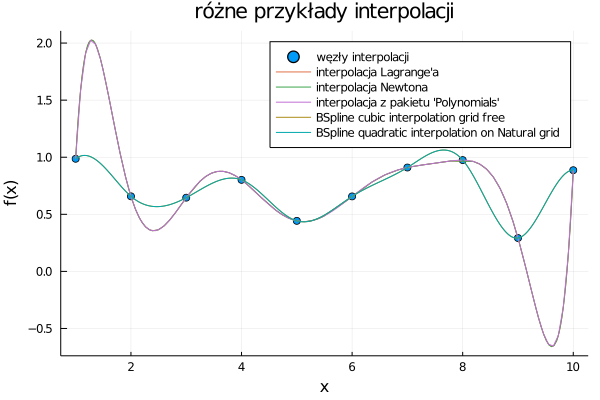

In [114]:
interp_quad = interpolate(ys, BSpline(Quadratic(Natural(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot!(xsf,ysf3, label="BSpline quadratic interpolation on Natural grid")

Widać, że BSpline'y (zarówno sześcienne jak i kwadratowe) są pozbawione efektu Runghego na końcach przedziałów. Efekt ten występuje przy interpolacji wielomianowej przy końcach przedziałów i znacząco obniża dokładność przybliżeń funkcji interpolacją wielomianową. Jak widać, jednym ze sposobów na pozbycie się tego efektu jest użycie funkcji sklejanych (np. BSpline'ów)